In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

print("Summary of the YOLO version 8 nano model.\n")
model.info()


Summary of the YOLO version 8 nano model.

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [ ]:
#### Training the model on the (Red, Green, Thermal) RGT Images

from ultralytics import YOLO

data_RGT = "/content/drive/MyDrive/Dataset1/split_80_10_10/data.yaml"

model= YOLO("yolov8n.pt")
result= model.train(data=data_RGT,
                    epochs=100,
                    batch=8,
                    imgsz=640,
                    optimizer='SGD',
                    weight_decay=0.0005,
                    lr0=0.01,
                    project="/content/drive/MyDrive/Dataset1",
                    name="training_results2") ### save name and path as you want

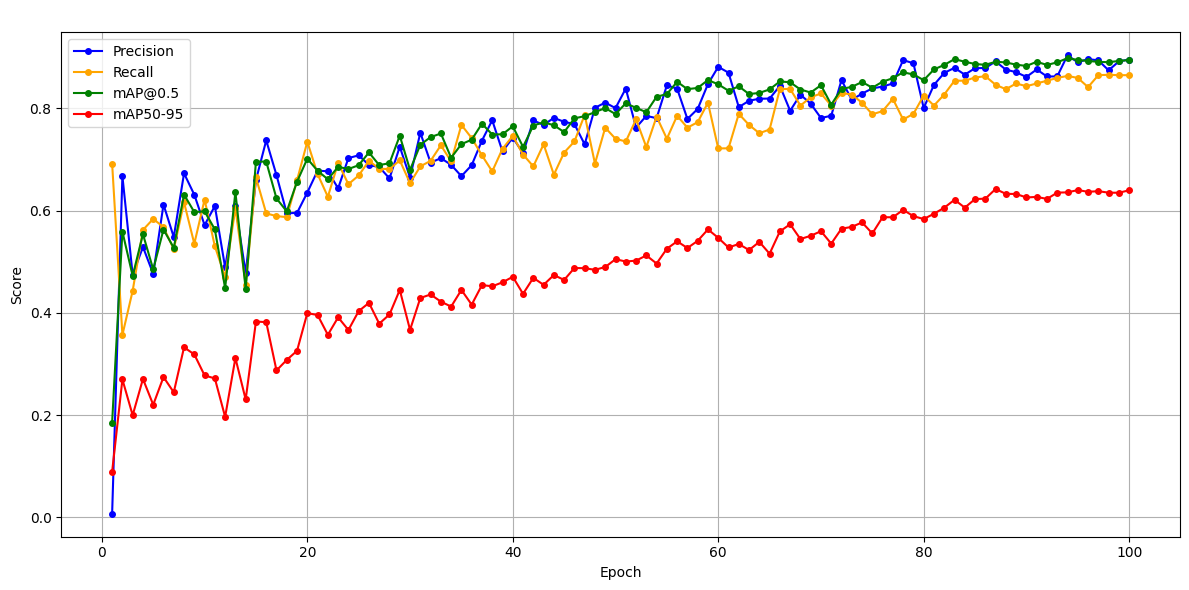

In [ ]:
## Preparing Graph to show progress in epochs
import pandas as pd
import matplotlib.pyplot as plt


csv_path = "/content/drive/MyDrive/Dataset1/training_results2/results.csv" ### Change path based on yours
df = pd.read_csv(csv_path)

plt.figure(figsize=(12, 6))

plt.plot(df['epoch'], df['metrics/precision(B)'],
         label='Precision', color='blue', marker= 'o', markersize=4)

plt.plot(df['epoch'], df['metrics/recall(B)'],
         label='Recall', color='orange', marker= 'o', markersize=4)

plt.plot(df['epoch'], df['metrics/mAP50(B)'],
         label='mAP@0.5', color='green', marker= 'o', markersize=4)

plt.plot(df['epoch'], df['metrics/mAP50-95(B)'],
         label='mAP50-95', color='red', marker= 'o', markersize=4)

plt.title(" ")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### Testing the model 

from ultralytics import YOLO
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


data_RGT = "/content/drive/MyDrive/------------/split_80_10_10/data.yaml"
model_path = "/content/drive/MyDrive/---------/training_results2/weights/best.pt"
model = YOLO(model_path)

metrics = model.val(
    data=data_RGT,
    split="test",
    batch=8,
    imgsz=640,
    project="/content/drive/MyDrive/--------/testing_results",
    name="test_run",
    conf=0.25
)

metrics_dict = metrics.results_dict       
df_metrics = pd.DataFrame([metrics_dict])
df_metrics.to_csv("/content/drive/MyDrive/---------/testing_results/metrics.csv", index=False)
print(df_metrics)

In [ ]:
####################################
####################################
### Training the RGB Model (Dataset 2)

from ultralytics import YOLO
from google.colab import drive
drive.mount('/content/drive')


data_RGB = "/content/drive/MyDrive/dataset2/split_80_10_10/data.yaml"


model = YOLO("yolov8n.pt")

result= model.train(data=data_RGB,
                    epochs=100,
                    batch=8,
                    imgsz=640,
                    optimizer='SGD',
                    weight_decay=0.0005,
                    lr0=0.01,
                    project="/content/drive/MyDrive/path_to_save",
                    name="training_results")



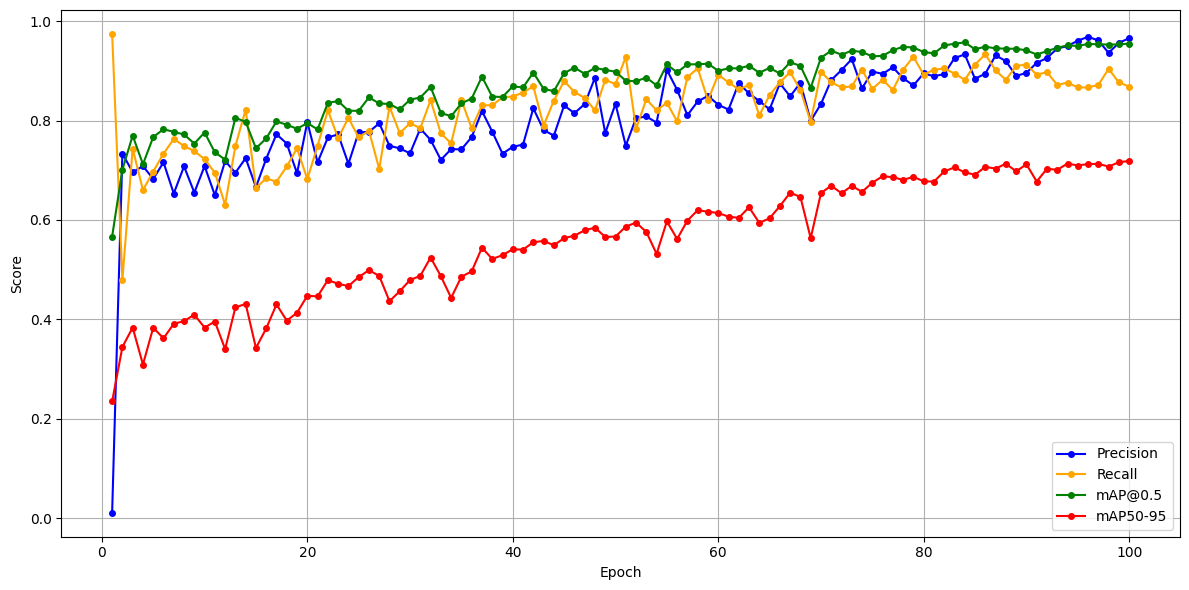

In [ ]:
## Preparing Graph to show progress in epochs
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "/content/drive/MyDrive/---------/training_results2/results.csv"
df = pd.read_csv(csv_path)

plt.figure(figsize=(12, 6))

plt.plot(df['epoch'], df['metrics/precision(B)'],
         label='Precision', color='blue', marker= 'o', markersize=4)

plt.plot(df['epoch'], df['metrics/recall(B)'],
         label='Recall', color='orange', marker= 'o', markersize=4)

plt.plot(df['epoch'], df['metrics/mAP50(B)'],
         label='mAP@0.5', color='green', marker= 'o', markersize=4)

plt.plot(df['epoch'], df['metrics/mAP50-95(B)'],
         label='mAP50-95', color='red', marker= 'o', markersize=4)

plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
'''Running the testing dataset in the saved model for RGB
Preparing in different cell after saving the models in the Drive so that
we dont have to run training again and again'''

from ultralytics import YOLO
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

data_RGB = "/content/drive/MyDrive/dataset2/split_80_10_10/data.yaml"
model_path = "/content/drive/MyDrive/change_based_on_yours/training_results2/weights/best.pt"
model = YOLO(model_path)

metrics = model.val(
    data=data_RGB,
    split="test",
    batch=8,
    imgsz=640,
    project="/content/drive/MyDrive/change_path_based_on_yours",
    name="test_run",
    conf=0.25
)

metrics_dict = metrics.results_dict     ### Code reference from Ultralytics
df_metrics = pd.DataFrame([metrics_dict])
df_metrics.to_csv("/content/drive/MyDrive/change_based_on_yours/metrics.csv", index=False)
print(df_metrics)

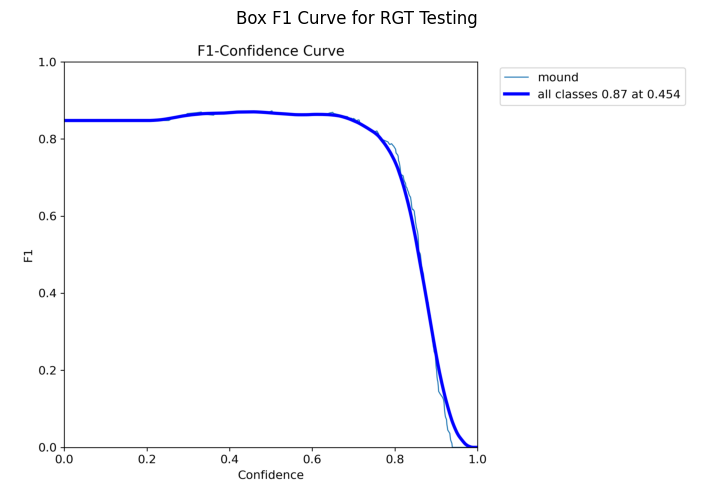

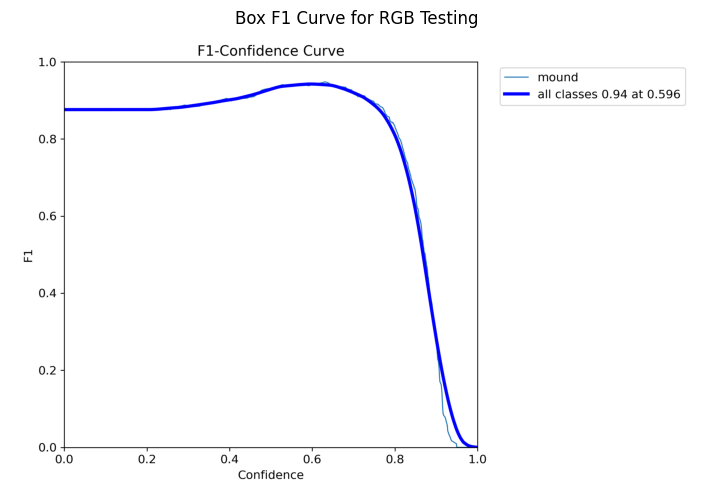

In [ ]:
### loading the F1 curve for both models

import matplotlib.pyplot as plt

img_path1 = "/content/drive/MyDrive/........../test_run16/BoxF1_curve.png"
img_path2 = "/content/drive/MyDrive/............./test_run16/BoxF1_curve.png"

img = plt.imread(img_path1)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title("Box F1 Curve for RGT Testing")
plt.axis("off")
plt.show()

img = plt.imread(img_path2)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title("Box F1 Curve for RGB Testing")
plt.axis("off")
plt.show()